# Milestone 1: Implement Non Negative Matrix Factorization from Scratch

## Module Imports

In [ ]:
# Required module imports
import numpy as np
from IPython.display import HTML, display
import numpy.linalg as LA

## Helper Methods

Helper Methods are provided to:
* create a document matrix 
* print the output of the NMF in nice tables

In [ ]:

def simple_document_processor(documents_list, words_to_remove = ['i', 'use', 'in', 'is', 'a', 'for']):
  """ Remove stop words, convert to lowercase and return both a Matrix with Document to Word counts and a Vocabularly for the dataset  """
  processed_docs = []
  for doc in documents_list:
    # make text document into a list of words
    words = doc.split(" ")
    # convert all words to lowercase
    words = [word.lower() for word in words]
    # remove all words that are provided in the words_to_remove list
    new_doc = [word for word in words if not word in words_to_remove]
    processed_docs.append(new_doc)

  # Make a list of unique words from all the documents (known as a vocabulary)
  vocab = [j for i in processed_docs for j in i]
  unique_vocab=list(set(vocab))

  # Replace each word in a document with its unique id from the vocabulary
  doc_vocabindex_list = []
  for doc in processed_docs:
    numeric_doc = [0] * len(unique_vocab)
    for word in doc:
      numeric_doc[unique_vocab.index(word)] = 1
    doc_vocabindex_list.append(numeric_doc)
  # Convert the list of word lists to a numpy Matrix
  doc_word_matrix = np.array(doc_vocabindex_list)

  # return the Matrix and Vocab list
  return (doc_word_matrix, unique_vocab)

def display_matrix_as_table(matrix, column_headers, row_headers, first_cell_text):
  """ Pretty print a Matrix as a table  """
  list_of_rows = matrix.tolist()
  html = "<table border='1' style='border-spacing:0px'>"
  html += "<tr>"
  html += "<td style='padding:5px'><h4>%s</h4></td>"%(first_cell_text)
  for header in column_headers:
    html += "<td style='padding:5px'><h4>%s</h4></td>"%(header)

  html += "</tr>"
  for rownum, row in enumerate(list_of_rows):
    html += "<tr>"
    html += "<td style='padding:5px'><h4>%s</h4></td>"%(row_headers[rownum])
    for field in row:
      html += "<td style='padding:5px;text-align:center'><h3>%.2f</h3></td>"%(field)
    html += "</tr>"

  html += "</table>" 
  html += "<br />" 
  display(HTML(html))     



## Convert a List of strings to a Document to Word Matrix




In [ ]:
documents = [
             "I use statistics in Data Science",
             "I use linear algebra in Data Science",
             "I program in python",
             "Python is a great language to program with",
             'I use python for Data Science',
             "I program linear algebra in python"
]
words_to_remove = ['i', 'use', 'in', 'is', 'a', 'for', 'to', 'with']

doc_word_matrix, unique_vocab = simple_document_processor(documents, words_to_remove)

display_matrix_as_table(doc_word_matrix, unique_vocab, documents, 'Documents')

Documents,algebra,data,science,program,language,linear,great,python,statistics
I use statistics in Data Science,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
I use linear algebra in Data Science,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
I program in python,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
Python is a great language to program with,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00
I use python for Data Science,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
I program linear algebra in python,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


## The NMF Class

Please complete the follwing steps in the code below:

* STEP 2: Initialise W and H with random values
* STEP 3: Implement the update rules for W and H
* STEP 4: Implement the perform_factorization() method
* STEP 5: Run NMF and review the resulting W and H matrices
* (CHALLENGE) STEP 7: Implement Early Stopping

In [ ]:
np.set_printoptions(suppress=True)

class NMF():

  def __init__(self, A, no_topics=2, **kwargs):

    self.A = A
    self._no_topics = no_topics

    self._no_documents, self._no_words = self.A.shape

    self._epsilon = 2**-8

  def calc_reconstruction_error(self):
    """ Euclidean error between X and W*H using Frobenious norm """

    if hasattr(self,'H') and hasattr(self,'W'):
      error = LA.norm(self.A - np.dot(self.W, self.H))
    else:
      error = None

    return error

  def randomize_wh(self):
    """ Initalize W and H with random values between 0 and 1."""
    # Todo - STEP 2 -  Initialise W and H with random values
    self.W = np.random.random((self._no_documents, self._no_topics))
    self.H = np.random.random((self._no_topics, self._no_words))

  def update_h(self):
    # Todo - STEP 3: Implement the update rules for W and H
    # H = H .* (W'A) ./ (W'WH + epsilon)
    AtW = np.dot(self.W.T, self.A)
    HWtW = np.dot(self.W.T.dot(self.W), self.H ) + self._epsilon
    self.H *= AtW
    self.H /= HWtW

  def update_w(self):
    # Todo - STEP 3: Implement the update rules for W and H
    # W = W .* (AH' ) ./ (WHH' + epsilon)
    AH = self.A.dot(self.H.T)
    WHtH = self.W.dot(self.H.dot(self.H.T)) + self._epsilon
    self.W *= AH
    self.W /= WHtH

  def perform_factorization(self, max_iter=1000, tolerance=0.001):
    
    #Todo - STEP 4: Implement the perform_factorization() method

    self.randomize_wh()
    self.reconstruction_error = np.zeros(max_iter)

    self.reconstruction_error[0] = self.calc_reconstruction_error()
    previous_error = self.reconstruction_error[0]

    number_of_iterations = 0

    #Todo - CHALLENGE) STEP 7: Implement Early Stopping
    for i in range(1, max_iter):
      number_of_iterations = i

      self.update_w()
      self.update_h()
      self.reconstruction_error[i] = self.calc_reconstruction_error()

      if (previous_error - self.reconstruction_error[i]) / self.reconstruction_error[0] < tolerance:
        break
      previous_error = self.reconstruction_error[i]
   
    return (self.W, self.H, self.reconstruction_error, number_of_iterations)
   
max_iter = 100
nmf = NMF(doc_word_matrix, no_topics=2)
W, H, reconstruction_error, number_of_iterations = nmf.perform_factorization(max_iter)

display_matrix_as_table(W, ['Topic 1', 'Topic 2'], documents, 'Documents')

display_matrix_as_table(H, unique_vocab, ['Topic 1', 'Topic 2'], 'Topics')

Documents,Topic 1,Topic 2
I use statistics in Data Science,0.00,0.46
I use linear algebra in Data Science,0.01,0.59
I program in python,0.49,0.00
Python is a great language to program with,0.67,0.00
I use python for Data Science,0.20,0.39
I program linear algebra in python,0.56,0.16


Topics,algebra,data,science,program,language,linear,great,python,statistics
Topic 1,0.37,0.01,0.02,1.64,0.64,0.37,0.64,1.80,0.00
Topic 2,0.93,1.96,1.95,0.00,0.00,0.93,0.00,0.26,0.62


## Plot the Reconstruction Error 

The code below implements:
 * STEP 5: Plot the reconstruction error]

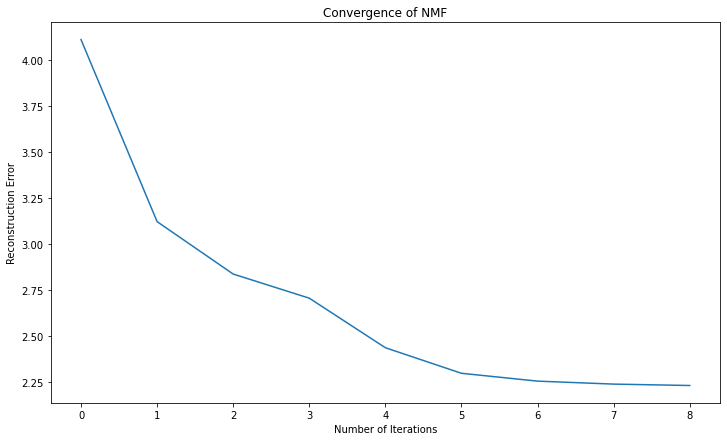

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(range(number_of_iterations), reconstruction_error[0:number_of_iterations])  

plt.xlabel("Number of Iterations")
plt.ylabel("Reconstruction Error")
plt.title("Convergence of NMF")

plt.show()


$\color{white}{\text{DON"T JUST COPY THIS NOTEBOOK - USE JUST TO CHECK SOLUTION AND THEN SUBMIT YOUR OWN!}}$